# Dimensionality Reduction: 

# Motivation 1: Data Compression: 

### Gaive examples of using dimensionality reduction to remove redundancy in the data: 
- Not only allows us compress the data (use up less disk space and computer memory) but also make learning algorithms run faster. 
- Eliminate redundant features. 
    - `cm` and `inches`
    - `happiness` and `joy`
    - DOUBT: How does PCA end up eliminating redundant features? 
- Merge features that are dependent/ highly correlated to each other. Eg:
    - `pilot skill` and `pilot enjoyment` ==> `pilot aptitude`
    - `length` and `breadth` ==> `area`
    - DOUBT: How does PCA end up merginghighly correlated features? 

### Illustrate how to project 2D onto a 1D line: 
- Plot the 2 redundant features against one another. 
    - Eg: `cm` and `inches` graph. 
- Draw a straight line through the data. 
- Use that straight line to measure whatever you were first measuring with `cm` or `inches`. 
- The farther a point is on the straight line, the large number , $z^i$ get assigned to it. 
- If you had an example $x^i \in \mathbf{R}^2$, now you can use $z^i \in \mathbf{R}$.
- Now you will need just one number, not a vector of 2 number to measure whatever it is that you were measuring. 

### Illustrate how to project 3D onto a 2D surface:  

- Note that, real data will have around 1000 features lying in 1000-dimensional graph(if that is a thing). And we would want to compress it a just 100 features lying in 100 dimensions. 
- Lets say we have $x^i \in \mathbf{R}^3$ 
- We can project this data down on a 2 dimensional square plane.
- We can then ignore one of the dimension,and draw two new axis (z1 and z2) as the (x,y) axis of the square plane. 
- http://www.holehouse.org/mlclass/14_Dimensionality_Reduction.html

# Motivation II: Data Visualisation:

### Use dimensionality reduction to reduce data to 2D for visualization: 
- Using dimensionality reduction, instead of having each training example represented by feature vector, $x^i \in \mathbf{R}^n$, we can come up with a different feature representation: $z^i \in \mathbf{R}^2$. 
- If that's the case, we can just have a pair of numbers $z_1, z_2$ that somehow sumarize our $n$ features.
- This way, we can plot each training examples in $R^2$ space and use that to try and understand the feature space of different training examples. 
- __NOTE:__ If you look at the output of the dimensionality reduction algorithm, it usually doesn't assign a meaning to the new features. It's often upto us to decide what these features mean. (It's useful to depict their _overall_ meaning, helps to understand the data). 

# Principal Component Analysis Problem Formulation:   
- For the problem of dimensionality reduction, by dar the most popular algorithm is called Principle Component Analysis or PCA. 
- Formulation of PCA: Let's try to formulate, precisely what we would like PCA to do. 

### Describe the goal of PCA when projecting 2D data onto a 1D line: 
- Let's say we want to reduce the dimension of the data from two dimensional to one dimensional. 
- We draw a line through the 2D data. 
- The reason we think a line through the data is a good choice is that if we look at where the _projected version_ of the datapoint scale, we find that the distance between each datapoint and the projected version is pretty small. 
- Formally, PCA tries to find a lower dimensional surface (1D, in this case) onto which to project the data so that the sum of squares distances between the datapoint and projected version is minimal. 
- The distances between the datapoint and projected version is also called the _projection error_. 
- __NOTE:__ Before applying PCA, it's standard prcative to first perform mean normalization (feature scaling) so that the features have zero mean and have comparable rang of values. 
<img src = "images/dim_reduction/pca_problem_formulation2d.png">
- In the above image, you can clearly see why PCA would prefer the red line over the pink one. The pink line results in a much larger distance between the datapoints and their respective projected versions. 

### Describe the goal of PCA when projecting an n dimensional data onto k dimensions:   

- The goal of PCA in the above example is to find $k(1)$ direction ( a vector $\vec{u^1} \in \mathbf{R}^n$) onto which to project the data so as to minimize the projection error. 
- We find the line onto which to project the datapoints by extending out the vector $\vec{u^1}$. 
- Ofcourse, it would not matter if we use $\pm \vec{u^1}$ as we will be extending it in both sides to create the line onto which to porject the datapoints. 

The above example was of a 2 dimensional data being projected into 1 dimensional.    


<img src = "images/dim_reduction/pca_problem_formulation3d.png">  


__What about when we have n dimensional data to be reduced to k dimensional data?__ 
- Find $k$ vectors $\vec{u^1}, \vec{u^2}, \vec{u^3}, ... ,\vec{u^k}$ onto which to project the data as to minimize the projection error. 
- We're going to find the set of vectors $\vec{u^1}, \vec{u^2}, \vec{u^3}, ... ,\vec{u^k}$, and project the data onto the _linear subspace_ spanned by this set of k vectors.
    - _linear subspace_: my idea is that _linar subspace_ in 1D is a line, in 2D is a square(2D graph), in 3D is a 3 dimensional plane. 
    - and what we are doing is that: these $k$ vectors (which define our new _linear subspace_) will become __our new (reduced) feature axes__. They will define the projection of a datapoint in n dimensions to $k$ dimensions, thus helping us:
      -  use less memory
      - and visualise the feature space in lesser dimensions. 
- Intuitively, just think it as finding $k$ directions instead of just $1$ direction onto which to project the data.   
- More Formally, we want to find $k$ vectors $\vec{u^1}, \vec{u^2}, \vec{u^3}, ... ,\vec{u^k}$ onto which to project the data as to minimize the _sqaured orthogonal projection error_. 


### Differentiate the goals between PCA and Linear Regression: 
- __Point 1: Error__: 
    - In Linear Regression, we try to predict the value of some variabe `y`, given some variabel `x`. We try to minimise the __vertical squared distance__ between the datapoint and the straight line. 
    - In contrast, PCA tries to minimise the __orthogonal squared distance__ between the datapoint and its _projected version_.
<img src = "images/dim_reduction/lin_reg_vs_pca_distance.png">
- __Point 2: Prediction__: 
    - When doing linear regression, there is a distinguished variable `y` that we are trying to predict. It trie to taking all the values of `x` and use that to predict `y`. 
    - In PCA, there is not distinguished `y` that we're trying to predict. We instead have a list of features $x_1, x_2 ... , x_n$ and all of these features are treated equally, no one of them is special. 

# Princpal Component Analysis Algorithm: 

### Prepare data for PCA by performing mean normalization / feature scaling: 
- # $ x_j^i = \frac{x_j^i - \mu_j}{\sigma_j}$
DOUBT: Why is it important to perform feature scaling before PCA? 


### Describe the goal of PCA when projecting n-dimensional data onto k-dimensions:     
- For $2D$ to $1D$: We are given the examples $x^i \in \mathbf{R}^2$ and we want find a set of $m$ numbers $z^i \in \mathbf{R}$ to to represent the data. 
- For $n$-$D$ to $k$-$D$: We are given the examples $x^i \in \mathbf{R}^n$ and we want find a set of $m$ vectors $z^i \in \mathbf{R}^k, z^i = [z_1,...,z_k]$ to to represent the data. 

### Use a mathematical toolkit to compute the Singular Value Decomposition (SVD) of a covariance matrix:   
- So how do you compute all of these quantities? 
- It turns out that a mathmatical derivation, also the mathematic _proof_, for what is the right value of the vectors onto which to project the data points ($\vec{u^1}, \vec{u^2}, \vec{u^3}, ... ,\vec{u^k}$) is very complicated. 
- Once done, it turs out that the procedure to acutally find the value of $\vec{u^1}$ is not hard, even though the proof is hard. 
- __DOUBT: Covariance Matrix__: 
    - # $\frac{1}{m} \sum_{i=1}^{n}(x^i)_{n \times 1}(x^i)_{1\times n}^T$
    - ### `covar_matrix = (1/m)*X.T*X` (not sure)
- __DOUBT: Singular Value Decomposition__: 
    - https://www.youtube.com/watch?v=P5mlg91as1c  
    - ### `U, S, V = svd(CovarianceMatrix)`$_{n \times n}$

### Compute the projected features using the results from SVD: 
- We will just need the `U`$_{n \times n}$ matrix. 
- It turns out that the columns of the `U` matrix will be exactly the ($\vec{u^1}, \vec{u^2}, \vec{u^3}, ... ,\vec{u^n}$. 
- So, in order to perform PCA, and reduce the $n$ dimensional data into $k$ dimensional data, we just need to pick the first $k$ column vectors from `U`, and project our data onto the _linear subspace_ formed by our $k$ column vectors. 
- Therefore, selecting the first $k$ columns will give us a matrix `U`$_{n \times k}$ which will be the same as  `U`$_{reduce}$.
    - ### `Ureduce = U[:,:k]` 
- Finally, to compute the matrix of the new features (reduced features), we are going to take multiply `X`$_{m \times n}$, our original input matrix by  `U`$_{n \times k}$. 
    - ### `z` = `Ureduce`$_{k \times n}^T$  ` * x`$_{n \times 1}$
        - `Ureduce` is a $k \times n$ matrix, with each row corresponding to one direction vector ($u^1, u^2 , ..., u^k$)
            - Each direction vector has $n$ elements, as each dirtection vector belongs to same _space_ as the original feature vectors $x^1, x^2, ..., x^m$. 
        - `x` is a $n \times 1$ matrix, with each row corresponding to one feature value. ($x_1, x_2, ..., x_n$). 
    - When we compute `z` = `Ureduce`$_{k \times n}^T$  ` * x`$_{n \times 1}$, we are multiplying each _direction vector ($u^1, u^2 , ..., u^k$)_ with with the _feature vector_($x^1$) 
    - ## `Z` = 
    - ### $[ ]_{n\times k} \dot [ ]_{n \times 1}$  
    - ### $[ [u_1^1.x_1 + u_2^1.x_2 + .... u_n^1.x_n]$  
    - ### $[u_1^2.x_1 + u_2^2.x_2 + .... u_n^2.x_n]$  
    - ### $[........................]$  
    - ### $[u_1^k.x_1 + u_2^k.x_2 + .... u_n^k.x_n]]$ 
    - This gives us a `z`$_{k \times 1}$ column vector, where each row element is a feature.
    - In Code, `X` is a ${m \times n}$ matrix, with each row being a feature vector (instead of each column) so we will use the following formula: 
    - ### `z`$_{m \times k}$ ` = X`$_{m \times n}$ ` * Ureduce`$_{n \times k}$   
    
- This will give us a $m \times k$, which means each row will represent the new, reduced features for each training instance. 


# Reconstruction from Compressed Representation: 
- If PCA is a compression algorithm, which helps us compress our data from high dimensional data to low dimensional data, we can use it to convert low dimensional data, back to its original form (high dimensional data)
- Given $z^i \in \mathbf{R}^k$, find $x^i \in \mathbf{R}^n$. 

### Compute the reconstruction of the data using the lower dimensionality representation: 
- If the above equation to calculate z is true. 
    - ## `z`$_{m \times k}$ ` = X`$_{m \times n}$ ` * Ureduce`$_{n \times k}$ 
- Then `X`:
    - ## `X`$_{\approx, m \times n}$ ` = z`$_{m \times k}$ `* Ureduce.T`$_{k \times n}$ 

 # Choosing the Number of Principal Components:  
- In the PCA algorithm, we take N dimensional features and reduce them to some K dimensional feature representation.  
- This number K is a parameter of the PCA algorithm. 
- This number K is also called  the number of principle components retained. 
- How to choose the number of principle components? 

 

### Demonstrate how the percentage of variance retained can be used to select the number of principal components to keep:   
- PCA tries to minimise the average squared projection error:
    - ### $\frac{1}{m}\sum_{i = 1}^m||x^i - x_{\approx}^i||^2$
    - where $x_{\approx}^i$ is the regenerated version of the original data. 
- The total variation in the data can be defined as the avergae over the data saying how far are the training examples from the origin: 
    - ### $ \frac{1}{m}\sum_{i = 1}^m||x^i||^2$ 
- Pretty common rule of thumb of choosing k is that:
    - Choose k to be small value so that:   
    - # $\frac{\frac{1}{m}\sum_{i = 1}^m||x^i - x_{\approx}^i||^2}{\frac{1}{m}\sum_{i = 1}^m||x^i||^2} \leq 0.01(1\%)$
- The ratio between the average squared projection error with total variation in data to be less that 0.01. 
- Basically, the average squared projection error should account for 1% (or less) of the total variation in the data, such that 99% of the variance is retained.
- Let me explain: 
    - It the ratio is small, then this means the numerator is small, or the error is small. In other words, $x^i = x_{\approx}^i$.
    - i.e, we want to lose very little information in the dimensionality reduction, so when we decompress we regnerate the same data. 
    - DOUBT: Can we say that the variance in $x_{\approx}^i$ and $x^i$ should be similar?
   - if we calculate: 
   - # $ \frac{\frac{1}{m}\sum_{i = 1}^m||x_{\approx}^i||^2}{\frac{1}{m}\sum_{i = 1}^m||x^i||^2} \geq 0.99$, is that the same thing as: 
   - # $\frac{\frac{1}{m}\sum_{i = 1}^m||x^i - x_{\approx}^i||^2}{\frac{1}{m}\sum_{i = 1}^m||x^i||^2} \leq 0.01(1\%)$
   

__Algorithm:__ 
- Try PCA = 1
- Compute the __`CovarianceMatrx`__ of the input matrix:
    - ### $\frac{1}{m} \sum_{i=1}^{n}(x^i)_{n \times 1}(x^i)_{1\times n}^T$
- Compute __`U`__ by using S.V.D of the corvariance matrix of the input matrix. 
    - ### `U, S, V = svd(CovarianceMatrix)`$_{n \times n}$
- ### `Ureduce = U[:,:k]`
- Compute the reduce feature matrix __`z`__: 
    - ### `z`$_{m \times k}$ ` = X`$_{m \times n}$ ` * Ureduce`$_{n \times k}$ (not sure)  
- Regenerate the feature back to their original form: 
    - ### `X`$_{\approx, m \times n}$ ` = z`$_{m \times k}$ `* Ureduce.T`$_{k \times n}$ (not sure) 
- Check if:
    - # $\frac{\frac{1}{m}\sum_{i = 1}^m||x^i - x_{\approx}^i||^2}{\frac{1}{m}\sum_{i = 1}^m||x^i||^2} \leq 0.01(1\%)$ ? 

### Use the singular values returned by SVD to efficiently compute the top principle components to keep:   
- You can imagine that the above algorithm can proive inefficient as we are going through every possible `k` value. 
- Fortunately when you implement PCA, especially this step:
    - ### `U, S, V = svd(CovarianceMatrix)`$_{n \times n}$
- __`S`__ is going to be a diagonal matrix. 
- For given value of `k`, this value:
    - ## $\frac{\frac{1}{m}\sum_{i = 1}^m||x^i - x_{\approx}^i||^2}{\frac{1}{m}\sum_{i = 1}^m||x^i||^2} \leq 0.01(1\%)$ can be computed much easily using `S`.
    - ## $ = 1 - \frac{\sum_{i=1}^k S_{ii}}{\sum_{i=1}^nS_{ii}}$
        - $ii$ because it is a diagonal matrix and will have elements in $ii$ only. 
        - $\sum_{i=1}^k S_{ii}$ is the sum of the first `k` diagonal elements of __`S`__. 
        - ${\sum_{i=1}^nS_{ii}}$ is the sum of the of the all the diagonal elements of __`S`__. 
- So we can just check whether: 
    - ## $ 1 - \frac{\sum_{i=1}^k S_{ii}}{\sum_{i=1}^nS_{ii}} \leq 0.01 (1\%)$
    - OR
    - ## $\frac{\sum_{i=1}^k S_{ii}}{\sum_{i=1}^nS_{ii}} \geq 0.99 (99\%)$ 

__Algorithm:__ 
 - Compute the __`CovarianceMatrx`__ of the input matrix:
    - ### $\frac{1}{m} \sum_{i=1}^{n}(x^i)_{n \times 1}(x^i)_{1\times n}^T$
- Compute __`U`__ by using S.V.D of the corvariance matrix of the input matrix. 
    - ### `U, S, V = svd(CovarianceMatrix)`$_{n \times n}$  
    
- ### For each `k`, keep checking: 
    - ## $\frac{\sum_{i=1}^k S_{ii}}{\sum_{i=1}^nS_{ii}} \geq 0.99 (99\%)$ ? 
- ### until optimum `k` value is found. 

### What if you pick values manually? 
- Even if you were to pick values manually, a good way to explain other what you did is to calculate the variance retained. 
- This way you can explain others and yourself how much your reduced dimensional data is approximating the original data.  

# Advice for applying PCA: 
- How to speed up the running time of a learning algorithm
- Advice for applying PCA

### Describe how dimensionality reduction can be used to speed up a learning algorithm:  
- Lets say your feature vectors are very high dimensional: $x^i \in \mathbf{R}^{BigN}$
    - For example: You are doing a computer vision problem and your images are $100 \times 100$ , so you have $x^i \in \mathbf{R}^{10000}$
- This will make supervised learning algorithms run slowly as there are too many features.
- What to do? 
    - Extract inputs: $x^1, x^2, .., x^m \in \mathbf{R}^{BigN}$ 
    - Apply PCA, and get $z^1, z^2, ..., z^m \in \mathbf{R}^{SmallerN}$
    - New training set: 
        - $z^1, z^2, ..., z^m$
    - Feed this training set along with its repctive outputs:
        - $(z^1, y^1), (z^2, y^2), ..., (z^m, y^m)$ 
    - to a learning algorithm which spits out a hypothesis $h_{\theta}(z)$. 
        

### Describe how PCA should be computed in the context of having both train and test datasets:  
- So, when you need to make a prediction on a test set __`X_test`__, you need use the principal components already calculated by the training set (like __`U`$_{reduce}$, `S`, `V`__) get the reduce dimensionality test set __`z_test`__.
- __Do not run PCA on the `X_test` to get the reduced features__
    - DOUBT: What is the difference between running PCA on both and using the results of SVD from before? 
    - DOUBT: Does it only help in run time or is there more to it? 
- You can then feed this __`z_test`__ to the hypthesis  $h_{\theta}(z)$ which will spit predictions out.  

### Summarizing Applications of PCA: 
- __Compression:__
    - Reduce memory/disk needed to store the data
    - Speed up leaning algorithm
        - Choose `k` by % of veriation retained. 
- __Visualization__: 
    - `k = 2` or `k = 3`. 

DOUBT: Why does PCA work? For real. 

### Explain why PCA is not appropriate for preventing overfitting: 

### Evaluate when PCA should be used in a machine learning system: 

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from scipy.io import loadmat

In [21]:
from mpl_toolkits.mplot3d import Axes3D  
path = path = os.path.join(os.getcwd(),"data","ex1data2.txt")
data2 = pd.read_csv(path, header = None, names = ["Size", 
                                                 "Bedroom",
                                                 "Price"])
data2.head()

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
x = np.array(data2["Size"])
y = np.array(data2["Bedroom"])
z = np.array(data2["Price"])

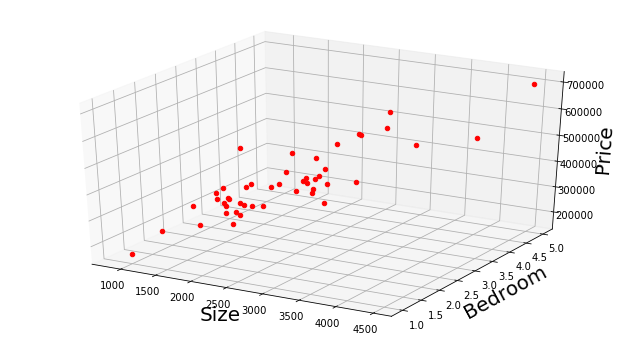

In [6]:
fig = plt.figure(figsize = (11,6))
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, c= "r", depthshade = False)
ax.set_xlabel("Size", fontsize = 20)
ax.set_ylabel("Bedroom", fontsize = 20)
ax.set_zlabel("Price",rotation = 90 ,fontsize = 20 )

In [22]:
# Sorting the dataframe according to ascending price values
data2.sort_values("Price", inplace = True)

In [33]:
ages = list(np.random.randint(20,60 ,size = len(X)))
ages.sort(reverse = True)
ages = pd.Series(ages)
ages.head()

0    59
1    59
2    57
3    55
4    54
dtype: int64

In [38]:
# Adding ages and rearranging columns: 
data = np.c_[data2, ages][:,[0,1,3,2]] 
data

array([[  1000,      1,     59, 169900],
       [   852,      2,     59, 179900],
       [  1427,      3,     57, 198999],
       [  1236,      3,     55, 199900],
       [  1380,      3,     54, 212000],
       [  1239,      3,     54, 229900],
       [  1416,      2,     53, 232000],
       [  1203,      3,     51, 239500],
       [  1940,      4,     51, 239999],
       [  1494,      3,     50, 242500],
       [  1604,      3,     50, 242900],
       [  1437,      3,     50, 249900],
       [  1100,      3,     49, 249900],
       [  1767,      3,     49, 252900],
       [  1888,      2,     47, 255000],
       [  1962,      4,     47, 259900],
       [  1268,      3,     45, 259900],
       [  1811,      4,     43, 285900],
       [  2162,      4,     40, 287000],
       [  1200,      3,     40, 299000],
       [  1320,      2,     39, 299900],
       [  2637,      3,     38, 299900],
       [  1852,      4,     38, 299900],
       [  1985,      4,     37, 299900],
       [  2567, 

In [39]:
x = np.array(data[:,0])
y = np.array(data[:,1])
z = np.array(data[:,2])

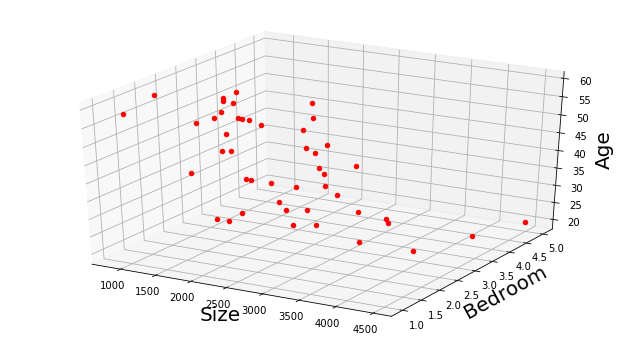

In [40]:
fig = plt.figure(figsize = (11,6))
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, c= "r", depthshade = False)
ax.set_xlabel("Size", fontsize = 20)
ax.set_ylabel("Bedroom", fontsize = 20)
ax.set_zlabel("Age",rotation = 90 ,fontsize = 20 )

In [42]:
X = data[:,[0,1,2]]
X[:10]

array([[1000,    1,   59],
       [ 852,    2,   59],
       [1427,    3,   57],
       [1236,    3,   55],
       [1380,    3,   54],
       [1239,    3,   54],
       [1416,    2,   53],
       [1203,    3,   51],
       [1940,    4,   51],
       [1494,    3,   50]])

### Mean Normalization: 

In [104]:
def mean_norm(x):
    X = x - x.mean(axis = 0)/x.std(axis = 0)
    return X

In [62]:
def svd(X):
    m = len(X)
    covar_matrix = (1/m)*X.T.dot(X)
    U, S_diag, V_T = np.linalg.svd(covar_matrix)
    return covar_matrix, U, S_diag, V_T

In [63]:
# ROUGH
covar_matrix, U, S_diag, V_T = svd(X)

In [65]:
# ROUGH
U # (n X n orthogonal matrix)

array([[ -9.99892403e-01,   1.46352840e-02,   9.95407710e-04],
       [ -1.44423104e-03,  -3.06886989e-02,  -9.99527948e-01],
       [ -1.45978276e-02,  -9.99421839e-01,   3.07065336e-02]])

In [66]:
# ROUGH
k = 2

In [67]:
# ROUGH
U_reduce = U[:,:k] # Reducing 3D to 2D

   - if we calculate: 
   - # $ \frac{\frac{1}{m}\sum_{i = 1}^m||x_{\approx}^i||^2}{\frac{1}{m}\sum_{i = 1}^m||x^i||^2} \geq 0.99$, is that the same thing as: 
   - # $\frac{\frac{1}{m}\sum_{i = 1}^m||x^i - x_{\approx}^i||^2}{\frac{1}{m}\sum_{i = 1}^m||x^i||^2} \leq 0.01(1\%)$
   
- So we can just check whether: 
    - ## $ 1 - \frac{\sum_{i=1}^k S_{ii}}{\sum_{i=1}^nS_{ii}} \leq 0.01 (1\%)$
    - OR
    - ## $\frac{\sum_{i=1}^k S_{ii}}{\sum_{i=1}^nS_{ii}} \geq 0.99 (99\%)$ Z = X.dot(U_reduce) # m

In [72]:
# ROUGH
X_aprx = Z.dot(U_reduce.T)
X_aprx.shape    

(47, 3)

In [82]:
# ROUGH
np.linalg.norm((X - X_aprx)[:1])

1.8075652429852167

In [84]:
# ROUGH
(np.linalg.norm((X - X_aprx), axis = 1)**2).mean()

0.44347520924642081

In [89]:
# ROUGH
X[:2]

array([[1000,    1,   59],
       [ 852,    2,   59]])

In [88]:
# ROUGH
np.linalg.norm(X[:2], axis = 1)

array([ 1001.73948709,   854.04273898])

In [105]:
# ROUGH
avg_proj_error = (np.linalg.norm((X - X_aprx), axis = 1)**2).mean()
avg_var_X =  (np.linalg.norm(X, axis = 1)**2).mean()
1 - (avg_proj_error/avg_var_X)

0.99999990405953421

In [117]:
def variance_retained_1(X, U_reduce, Z):
    X_aprx = Z.dot(U_reduce.T)
    # Find distance between X and X_aprx for each instance
    # and square it
    sq_norm_proj_error = np.linalg.norm((X - X_aprx), axis = 1)**2
    avg_sq_norm_proj_error = sq_norm_proj_error.mean()
    
    # Find variance of X
    sq_norm_X = np.linalg.norm(X, axis = 1)**2
    avg_sq_norm_X = sq_norm_X.mean()
    
    # Variance Retained: 
    var_ret = 1 - (avg_sq_norm_proj_error/avg_sq_norm_X)
    
    return var_ret

In [192]:
def variance_retained_2(X, U_reduce, Z):
    X_aprx = Z.dot(U_reduce.T)
    # Find Variance of X_aprx
    sq_norm_X_aprx = np.linalg.norm(X_aprx, axis = 1)**2
    avg_sq_norm_X_aprx = sq_norm_X_aprx.mean()
    
    # Find variance of X
    sq_norm_X = np.linalg.norm(X, axis = 1)**2
    avg_sq_norm_X = sq_norm_X.mean()
    
    # Variance Retained: 
    var_ret = avg_sq_norm_X_aprx/avg_sq_norm_X
    
    return var_ret

In [94]:
# ROUGH
covar_matrix.shape

(3, 3)

In [95]:
# ROUGH
V_T.shape

(3, 3)

In [93]:
# ROUGH
S_diag.shape

(3,)

In [102]:
# ROUGH
(S_diag)

array([  4.62183284e+06,   5.66715420e+02,   4.43475209e-01])

In [98]:
# ROUGH
np.sum(S_diag[:5])

4622399.9999999981

In [106]:
# ROUGH
k = 1
n = X.shape[1]
n

3

In [108]:
# ROUGH
X.shape

(47, 3)

In [111]:
# ROUGH
U_reduce.shape

(3, 2)

In [113]:
# ROUGH
Z.shape

(47, 2)

In [118]:
# ROUGH
while k < n:
    var_ret = variance_retained_1(X, U_reduce, Z)
    if var_ret >= 0.99:
        break
    k += 1
k

1

In [103]:
def variance_retained_3(X,S_diag,k):
    sum_k = np.sum(S_diag[:k])
    sum_n = np.sum(S_diag)
    var_ret = sum_k/sum_n
    return var_ret

In [196]:
def pca1(X, K):
    # Normalize the input matrix
    X = mean_norm(X)
    # Find the principal components 
    covar_matrix, U , S_diag, V_T  = svd(X)
    
    # Store the variances retained 
    # Index 0 is filled with 0, so that index 1 corresponds to 
    # variance retained when k = 1
    var_ret_master = [0] 
    
    # Store the reduced dimensional arrays for k - dimensions. 
    Z_master = [[0]]
    
    # Store the directional vectors for each k - dimensions.
    U_reduce_master = [[0]]
    
    # Initial k value
    k = 1
    # Looping to find lowest k value which retains 99% of the
    # variance in X. 
    while k <= K:
        # Extract k direction vectors from U (n X k)
        U_reduce = U[:,:k]
        # Append current U_reduce to U_reduce_master: 
        U_reduce_master.append(U_reduce)
        
        # Find new(reduced) features Z (m X k)
        Z = X.dot(U_reduce) 
        
        # Append current Z to Z master
        Z_master.append(Z)
        # Calculate variance retained by using current k value
        # In other words, caculate variance retained after projecting
        # the n dimensional data into k dimensions 
        var_ret = variance_retained_1(X, U_reduce, Z)
        
        # Append variance retained using current k
        var_ret_master.append(var_ret)
        
        """        
        # Stop process if current k retains >= 99% variance
        if var_ret >= 0.99:
            break
        """
        
        # Else, repeat process using next k value
        k += 1
    
    return Z_master, U_reduce_master, var_ret_master

In [197]:
Z_master, U_reduce_master, var_ret_master = pca1(X,2)
Z_master[-1].shape , U_reduce_master[-1].shape, var_ret_master

((47, 2), (3, 2), [0, 0.99988717024537599, 0.99999989354805741])

In [198]:
Z_k1_pca1 = Z_master[-2]
U_reduce_k1_pca1 = Z_master[-2]
Z_k2_pca1 = Z_master[-1]
U_reduce_k2_pca1 = U_reduce_master[-1]

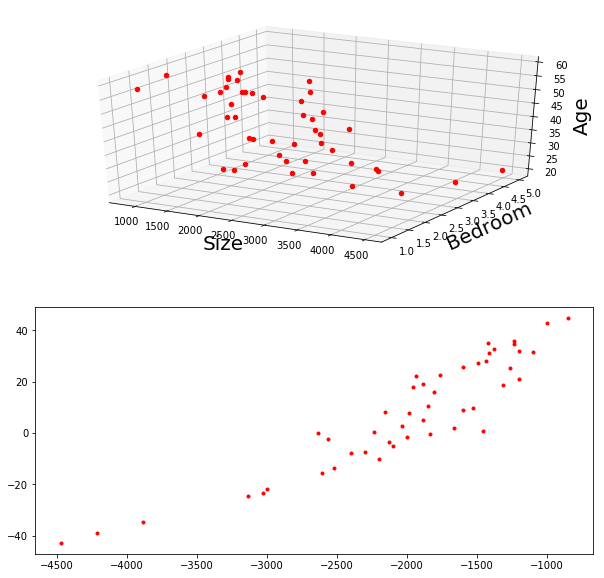

In [199]:
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c= "r", depthshade = False)
ax.set_xlabel("Size", fontsize = 20)
ax.set_ylabel("Bedroom", fontsize = 20)
ax.set_zlabel("Age",rotation = 90 ,fontsize = 20 )

plt.subplot(212)
plt.plot(Z_k2_pca1[:,0], Z_k2_pca1[:,1], "r.")

In [200]:
X_recovered = Z_k2_pca1.dot(U_reduce_k2_pca1.T)
X_recovered.shape

(47, 3)

In [201]:
X.mean(axis = 0)

array([ 2000.68085106,     3.17021277,    37.34042553])

In [202]:
X.std(axis = 0)

array([  7.86202619e+02,   7.52842809e-01,   1.25159925e+01])

In [203]:
# Unstandardizing X:
X_recovered = (X_recovered*X.std(axis = 0)) + X.mean(axis = 0)
X_recovered.shape

(47, 3)

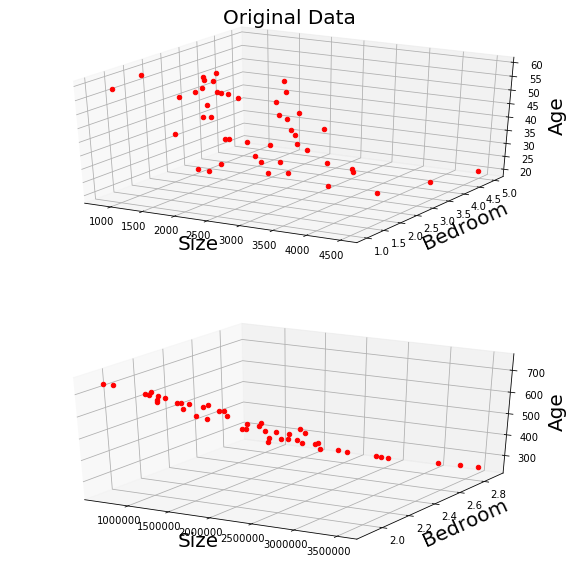

In [204]:
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c= "r", depthshade = False)
ax.set_xlabel("Size", fontsize = 20)
ax.set_ylabel("Bedroom", fontsize = 20)
ax.set_zlabel("Age",rotation = 90 ,fontsize = 20 )
plt.title("Original Data", fontsize = 20)

ax = fig.add_subplot(212, projection='3d')
ax.scatter(X_recovered[:,0], X_recovered[:,1], X_recovered[:,2],
           c= "r", depthshade = False)
ax.set_xlabel("Size", fontsize = 20)
ax.set_ylabel("Bedroom", fontsize = 20)
ax.set_zlabel("Age",rotation = 90 ,fontsize = 20 )

# Checking if: 
   - # $ \frac{\frac{1}{m}\sum_{i = 1}^m||x_{\approx}^i||^2}{\frac{1}{m}\sum_{i = 1}^m||x^i||^2} \geq 0.99$, is that the same thing as: 
   - # $\frac{\frac{1}{m}\sum_{i = 1}^m||x^i - x_{\approx}^i||^2}{\frac{1}{m}\sum_{i = 1}^m||x^i||^2} \leq 0.01(1\%)$
   

In [205]:
def pca2(X, K):
    # Normalize the input matrix
    X = mean_norm(X)
    # Find the principal components 
    covar_matrix, U , S_diag, V_T  = svd(X)
    
    # Store the variances retained 
    # Index 0 is filled with 0, so that index 1 corresponds to 
    # variance retained when k = 1
    var_ret_master = [0] 
    
    # Store the reduced dimensional arrays for k - dimensions. 
    Z_master = [[0]]
    
    # Store the directional vectors for each k - dimensions.
    U_reduce_master = [[0]]
    
    # Initial k value
    k = 1
    # Looping to find lowest k value which retains 99% of the
    # variance in X. 
    while k <= K:
        # Extract k direction vectors from U (n X k)
        U_reduce = U[:,:k]
        # Append current U_reduce to U_reduce_master: 
        U_reduce_master.append(U_reduce)
        
        # Find new(reduced) features Z (m X k)
        Z = X.dot(U_reduce) 
        
        # Append current Z to Z master
        Z_master.append(Z)
        # Calculate variance retained by using current k value
        # In other words, caculate variance retained after projecting
        # the n dimensional data into k dimensions 
        var_ret = variance_retained_2(X, U_reduce, Z)
        
        # Append variance retained using current k
        var_ret_master.append(var_ret)
        
        """        
        # Stop process if current k retains >= 99% variance
        if var_ret >= 0.99:
            break
        """
        
        # Else, repeat process using next k value
        k += 1
    
    return Z_master, U_reduce_master, var_ret_master

In [206]:
Z_master, U_reduce_master, var_ret_master = pca2(X,2)

In [207]:
Z_k1_pca2 = Z_master[-2]
U_reduce_k1_pca2 = Z_master[-2]
Z_k2_pca2 = Z_master[-1]
U_reduce_k2_pca2 = U_reduce_master[-1]

# Moment of Truth: 

In [208]:
(Z_k2_pca2 == Z_k2_pca1).all()

True

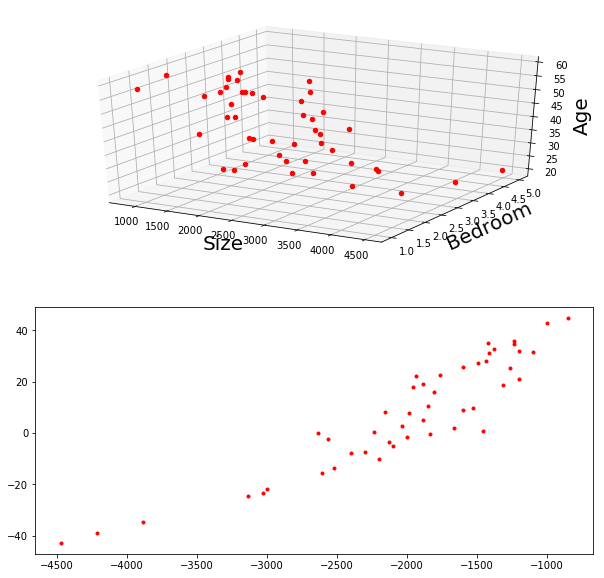

In [209]:
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c= "r", depthshade = False)
ax.set_xlabel("Size", fontsize = 20)
ax.set_ylabel("Bedroom", fontsize = 20)
ax.set_zlabel("Age",rotation = 90 ,fontsize = 20 )

plt.subplot(212)
plt.plot(Z_k2_pca2[:,0], Z_k2_pca2[:,1], "r.")

# Checking if: 
   - # $ \frac{\frac{1}{m}\sum_{i = 1}^m||x_{\approx}^i||^2}{\frac{1}{m}\sum_{i = 1}^m||x^i||^2} \geq 0.99$, is that the same thing as: 
   - # $\frac{\frac{1}{m}\sum_{i = 1}^m||x^i - x_{\approx}^i||^2}{\frac{1}{m}\sum_{i = 1}^m||x^i||^2} \leq 0.01(1\%)$ is the same thing as: 
    - ## $\frac{\sum_{i=1}^k S_{ii}}{\sum_{i=1}^nS_{ii}} \geq 0.99 (99\%)$
   

In [212]:
def pca3(X, K):
    # Normalize the input matrix
    X = mean_norm(X)
    # Find the principal components 
    covar_matrix, U , S_diag, V_T  = svd(X)
    
    # Store the variances retained 
    # Index 0 is filled with 0, so that index 1 corresponds to 
    # variance retained when k = 1
    var_ret_master = [0] 
    
    # Store the reduced dimensional arrays for k - dimensions. 
    Z_master = [[0]]
    
    # Store the directional vectors for each k - dimensions.
    U_reduce_master = [[0]]
    
    # Initial k value
    k = 1
    # Looping to find lowest k value which retains 99% of the
    # variance in X. 
    while k <= K:
        # Extract k direction vectors from U (n X k)
        U_reduce = U[:,:k]
        # Append current U_reduce to U_reduce_master: 
        U_reduce_master.append(U_reduce)
        
        # Find new(reduced) features Z (m X k)
        Z = X.dot(U_reduce) 
        
        # Append current Z to Z master
        Z_master.append(Z)
        # Calculate variance retained by using current k value
        # In other words, caculate variance retained after projecting
        # the n dimensional data into k dimensions 
        var_ret = variance_retained_3(X,S_diag, k)
        
        # Append variance retained using current k
        var_ret_master.append(var_ret)
        
        """        
        # Stop process if current k retains >= 99% variance
        if var_ret >= 0.99:
            break
        """
        
        # Else, repeat process using next k value
        k += 1
    
    return Z_master, U_reduce_master, var_ret_master

In [213]:
Z_master, U_reduce_master, var_ret_master = pca3(X,2)

In [214]:
Z_k1_pca3 = Z_master[-2]
U_reduce_k1_pca3 = Z_master[-2]
Z_k2_pca3 = Z_master[-1]
U_reduce_k2_pca3 = U_reduce_master[-1]

# Another moment of Truth: 

In [215]:
(Z_k2_pca2 == Z_k2_pca3).all()

True

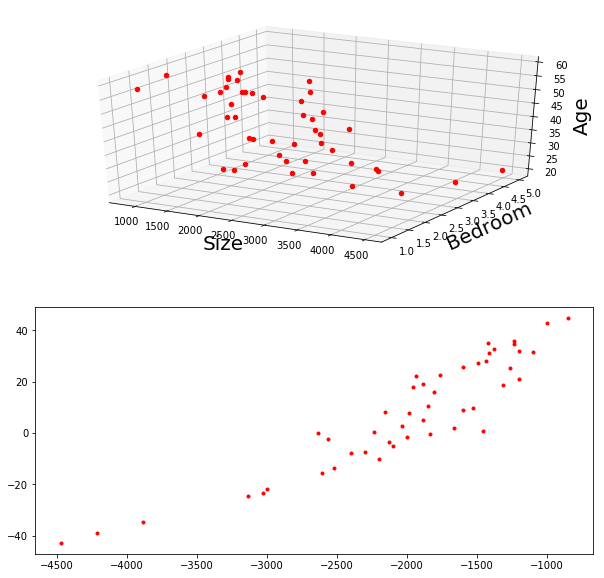

In [216]:
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c= "r", depthshade = False)
ax.set_xlabel("Size", fontsize = 20)
ax.set_ylabel("Bedroom", fontsize = 20)
ax.set_zlabel("Age",rotation = 90 ,fontsize = 20 )

plt.subplot(212)
plt.plot(Z_k2_pca3[:,0], Z_k2_pca3[:,1], "r.")

In [219]:
data = loadmat('data/ex7data1.mat')
data

{'X': array([[ 3.38156267,  3.38911268],
        [ 4.52787538,  5.8541781 ],
        [ 2.65568187,  4.41199472],
        [ 2.76523467,  3.71541365],
        [ 2.84656011,  4.17550645],
        [ 3.89067196,  6.48838087],
        [ 3.47580524,  3.63284876],
        [ 5.91129845,  6.68076853],
        [ 3.92889397,  5.09844661],
        [ 4.56183537,  5.62329929],
        [ 4.57407171,  5.39765069],
        [ 4.37173356,  5.46116549],
        [ 4.19169388,  4.95469359],
        [ 5.24408518,  4.66148767],
        [ 2.8358402 ,  3.76801716],
        [ 5.63526969,  6.31211438],
        [ 4.68632968,  5.6652411 ],
        [ 2.85051337,  4.62645627],
        [ 5.1101573 ,  7.36319662],
        [ 5.18256377,  4.64650909],
        [ 5.70732809,  6.68103995],
        [ 3.57968458,  4.80278074],
        [ 5.63937773,  6.12043594],
        [ 4.26346851,  4.68942896],
        [ 2.53651693,  3.88449078],
        [ 3.22382902,  4.94255585],
        [ 4.92948801,  5.95501971],
        [ 5.79295774,  

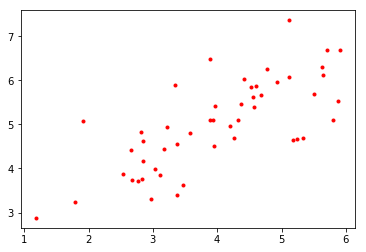

In [222]:
X = data["X"]
plt.plot(X[:,0], X[:,1], "r.")

In [223]:
Z_master, U_reduce_master, var_ret_master = pca3(X,1)

In [224]:
Z = Z_master[-1]
U_reduce = U_reduce_master[-1]

In [225]:
Z.shape, U_reduce.shape

((50, 1), (2, 1))

In [226]:
X_recovered = Z.dot(U_reduce.T)

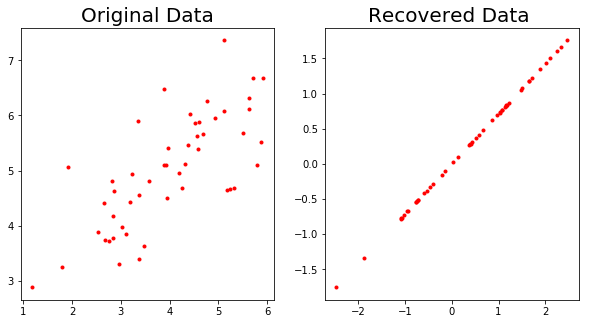

In [229]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.plot(X[:,0], X[:,1], "r.")
plt.title("Original Data", fontsize = 20)
plt.subplot(122)
plt.plot(X_recovered[:,0], X_recovered[:,1], "r.")
plt.title("Recovered Data ", fontsize = 20)

__Notice: The projection axis for the first principal component was basically a line through the dataset. When we reduce the data to one dimension, we lost the variations around that diagonal line, so in our reproduction everything falls along that diagonal. __ 